# Bayesian optimisation

## Understanding the algorithm

Bayesian optimization is a method used for optimizing objective functions that are costly to evaluate. It's particularly effective when you don't have an analytical form of the function (often referred to as a black-box function). This technique is widely applied in various fields, including machine learning, for tasks like hyperparameter tuning. It is suitable for both discrete and continuous problems, but often used in the continuous space where the evaluation of the objective function is costly.

The core idea behind Bayesian optimization is to use a probabilistic model to predict the performance of different configurations and to choose new configurations to try based on these predictions. It iteratively updates the model based on the performance of previous trials, making it more efficient than random search or grid search, especially when evaluations of the objective function are expensive.

Bayesian optimization also uses an acquisition function to balance exploration (trying new or uncertain configurations) and exploitation (focusing on configurations known to perform well). This balance is crucial for efficiently finding the best solution.

Here's an overview of how the algorithm works:

1. **Objective Function**: This is the function you want to optimize. It can be any complex function where evaluations are expensive, for example, a machine learning model's hyperparameter tuning based on its performance metric (like accuracy).

2. **Probabilistic Model (Surrogate Model)**: Bayesian optimization uses a surrogate model to approximate the objective function. A commonly used model is Gaussian Process Regression. This model is used to make predictions about the function's behavior in unseen areas of the search space.

3. **Kernel Function**: The kernel function within the Gaussian process is crucial as it influences the quality of the regression. A common choice is the ARD Matérn 5/2 kernel. The kernel function helps in defining the smoothness of the surrogate model.

4. **Acquisition Function**: This function guides the optimization process by deciding where to sample next. It balances exploration (trying out uncertain areas) and exploitation (focusing on areas known to perform well). Common types of acquisition functions include Expected Improvement, Probability of Improvement, and Lower Confidence Bound. Each has its way of calculating the "goodness" of a point based on the posterior distribution from the Gaussian process.

5. **Optimization of Acquisition Function**: This step involves determining the next point to sample. The Bayesian optimization algorithm maximizes the acquisition function to find this point, considering the balance between exploration and exploitation.

6. **Update Model**: Once the objective function is evaluated at the new sample point, the surrogate model is updated with this new data. The process repeats, iteratively refining the model.

7. **Stopping Criterion**: The process continues until a stopping criterion is met. This could be a set number of iterations, a convergence criterion, or when the improvement falls below a threshold.



## Usage examples

1. **Optimizing a Mathematical Function**: A classic example is optimizing a complex mathematical function defined over a specific range. For instance, a multimodal function with several peaks can be used as a test problem. This function could be $ y = x^2 \cdot \sin(5 \cdot \pi \cdot x)^6 $, with $ x $ being a real value in the range [0,1]. Gaussian noise is added to make the function challenging to optimize. The goal here is to find the input $ x $ that maximizes or minimizes the output $ y $ of this function.

2. **A/B Testing**: Bayesian optimization is used in A/B testing to optimize observable metrics related to product configurations, such as click-through rates for ads or user engagement for games. By redirecting small fractions of user traffic to different versions of a product, developers can use the noisy feedback to find the best product configuration.

3. **Recommender Systems**: Online content providers use recommender systems to suggest products to their subscribers. Bayesian optimization helps in recommending the right product, improving revenue for e-commerce sites or enhancing user consumption on content sites.

4. **Natural Language Processing (NLP) and Text Extraction**: In the field of NLP, Bayesian optimization is applied to improve text extraction processes. This involves optimizing models or algorithms in NLP to enhance their performance in extracting meaningful information from text data.

5. **Environmental Monitoring and Sensor Networks**: In environmental monitoring, Bayesian optimization is used to interpolate noisy measurements from sensor networks to create a global model of interest, such as mapping pollution levels or temperature variations. It's particularly useful when sensors are expensive to activate and only a limited number can be used at a time.

## Strengths

1. **Efficiency with Expensive Functions**: BO is highly efficient at handling expensive, noisy, or black-box objective functions. This efficiency is crucial in scenarios where each function evaluation incurs a significant cost, in terms of time or resources.

2. **Suitability for High-Dimensional Problems**: Unlike some traditional optimization methods, Bayesian Optimization is well-suited for high-dimensional problems. This makes it valuable in fields like machine learning, where optimizing functions with many variables is common.

3. **Incorporation of Uncertainty**: The surrogate model used in BO provides a measure of uncertainty. This feature is particularly useful for managing risk in the optimization process, as it allows for a more informed decision-making process regarding where to sample next.

4. **Balance Between Exploration and Exploitation**: The algorithm effectively balances exploration (sampling areas of the search space where the function behavior is uncertain) and exploitation (focusing on areas known to yield good results), which is critical for finding the global optimum of a function.

5. **Flexibility and Versatility**: Bayesian Optimization is flexible and can be adapted to a wide range of problems. This versatility makes it applicable across various fields and scenarios, from tuning machine learning models to optimizing chemical processes.

## Weaknesses

1. **Computational Expense**: BO can be computationally expensive, especially when dealing with a large number of observations or in high-dimensional spaces. The computational cost primarily arises from the Gaussian process used as the surrogate model, which can become unwieldy as the number of data points increases.

2. **Sensitivity to Model and Acquisition Function**: The performance of BO is highly dependent on the choice of the surrogate model and the acquisition function. Selecting inappropriate models or functions can significantly impact the effectiveness of the optimization process. This sensitivity often necessitates expert knowledge to make appropriate choices.

3. **Requirement for Expert Knowledge**: Properly implementing and tuning Bayesian Optimization might require deep understanding and expert knowledge, particularly in selecting appropriate hyperparameters and configuring the optimization algorithm. This can make it less accessible for non-experts.

4. **Difficulty in Handling Categorical Variables**: BO typically excels with continuous variables but can struggle with categorical variables. This can limit its applicability in problems where categorical variables play a crucial role.

5. **Local Trapping**: In some cases, BO can get trapped in local optima, especially in cases where the acquisition function does not sufficiently balance exploration and exploitation. This is a common challenge in many optimization techniques but can be particularly pronounced in BO due to its reliance on the surrogate model.

## Python demonstration


### Hyperparameters optimization

The provided code demonstrates the use of Bayesian optimization for hyperparameter tuning in Kernel Ridge Regression. This optimization is applied to a dataset exhibiting a convex-concave relationship. The goal is to find the optimal hyperparameters that minimize the model's error.

#### Steps in the Code

1. **Generating the Dataset:**
   - A dataset is created with `numpy` where `X` is a set of sorted random numbers.
   - A piecewise function defines `y`, exhibiting a convex behavior for `X < 2.5` and a concave behavior for `X >= 2.5`. This behavior is achieved by defining two functions (convex and concave) and smoothly transitioning between them at the `transition_point`.
   - Some noise is added to `y` to simulate real-world data irregularities.

2. **Setting Up the Regression Model:**
   - Kernel Ridge Regression (`KernelRidge`) with an RBF kernel is chosen as the regression model. This model is suitable for non-linear relationships.

3. **Defining the Hyperparameter Space:**
   - The hyperparameters to be optimized are `alpha` (regularization strength) and `gamma` (kernel coefficient). A range for these hyperparameters is defined using `Real` from `skopt.space`.

4. **Bayesian Optimization:**
   - An objective function is defined, calculating the negative mean of cross-validated mean squared error. This function is used by the Bayesian optimization process to evaluate the model's performance.
   - `gp_minimize` from `skopt` is used to perform Bayesian optimization. It iteratively selects hyperparameters to minimize the objective function.

5. **Model Training and Prediction:**
   - The model is trained with the best hyperparameters found by the optimization process.
   - Predictions are made on a test dataset created by evenly spaced values in `X`.

6. **Visualization of Optimization and Predictions:**
   - `plot_convergence` is used to display the convergence of the optimization process, illustrating the improvement in the objective function value over iterations.
   - `plot_objective` visualizes the landscape of the objective function, showing how the hyperparameters `alpha` and `gamma` influence the model's performance.
   - A scatter plot shows the actual values versus the model's predictions, providing a visual comparison of the model's performance.

#### Usage of Bayesian Optimization
Bayesian optimization is utilized here to efficiently search the hyperparameter space of the Kernel Ridge Regression model. It aims to find the set of hyperparameters (`alpha` and `gamma`) that result in the lowest cross-validated mean squared error. This method is particularly effective in optimizing complex functions with a limited number of function evaluations, making it suitable for tuning machine learning models.

The plot_convergence graph will show how quickly and effectively the Bayesian optimization process was able to converge to the best solution.


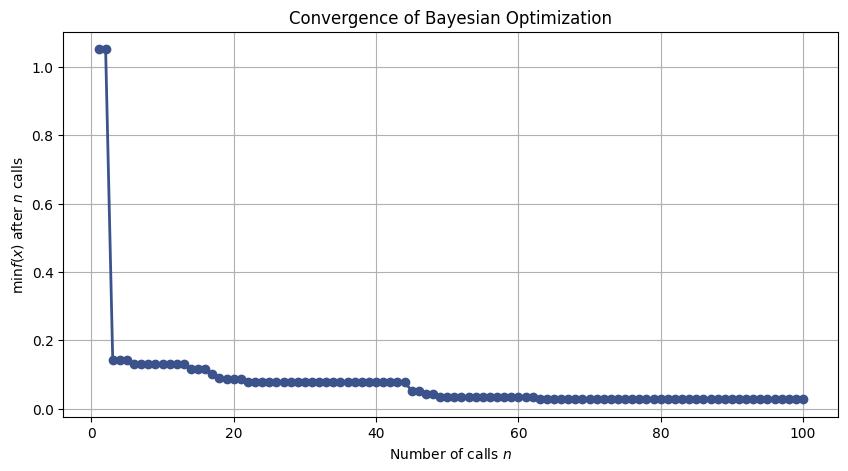

The plot_objective graph provides a visual representation of how changes in the hyperparameters alpha and gamma affected the model's performance.


<Figure size 1200x1000 with 0 Axes>

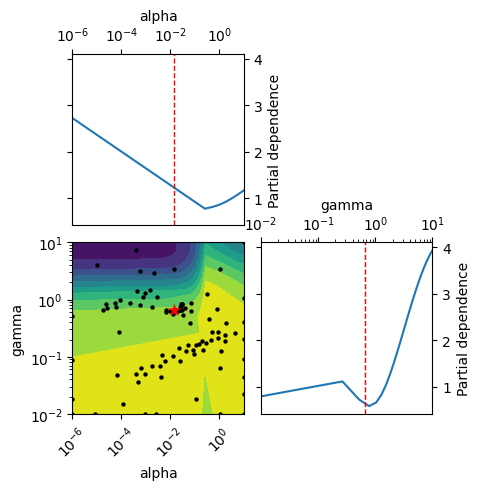

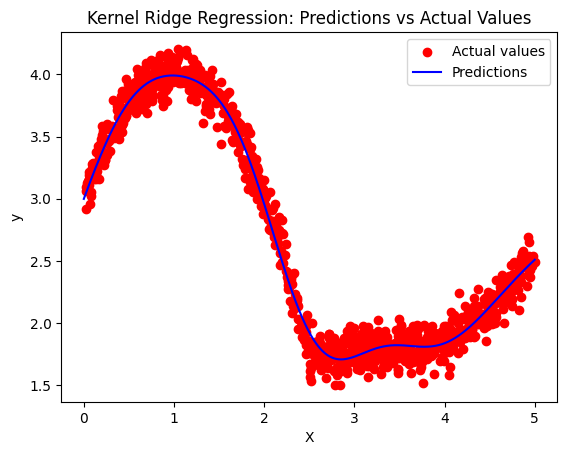

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.plots import plot_convergence, plot_objective

# Generate a dataset with a convex-concave relationship
np.random.seed(42)
X = np.sort(5 * np.random.rand(1000, 1), axis=0)

# Define the transition point bewteen convex behaviour and concave behaviour
transition_point = 2.5

# Calculate the value of the convex function at the transition point
convex_value_at_transition = 4 - (transition_point - 1)**2

# Adjust the concave function to start from this point
def concave_function(x):
    """
    Adjust a concave function to align with a specified convex value at a transition point.

    The original concave function is of the form: 0.1 * (x - 3)**3 + 1. This function adjusts
    it so that its value at a predefined transition point matches a given convex function value.

    Args:
    - x: The input value at which the function is evaluated.

    Returns:
    - Adjusted value of the concave function at x.

    Note:
    - `transition_point` and `convex_value_at_transition` should be defined outside this function.
    """
    # Calculate the original concave function value
    original_concave_value = 0.1 * (x - 3)**3 + 1

    # Calculate the concave function value at the transition point
    concave_value_at_transition = 0.1 * (transition_point - 3)**3 + 1

    # Calculate the adjustment needed to align with the convex function at the transition point
    adjustment = convex_value_at_transition - concave_value_at_transition

    # Return the adjusted concave function value
    return original_concave_value + adjustment

# Define the piecewise function
y = np.piecewise(X.flatten(), 
                 [X.flatten() < transition_point, X.flatten() >= transition_point],
                 [lambda x: 4 - (x - 1)**2,  # Convex part
                  concave_function])  # Adjusted Concave part

y += np.random.normal(0, 0.1, size=X.shape[0])  # Add some noise

# Choose a regression model: Kernel Ridge Regression
kernel_ridge_model = KernelRidge(kernel='rbf')

# Define the hyperparameter space
space  = [Real(1e-6, 1e+1, "log-uniform", name='alpha'),
          Real(1e-2, 1e+1, "log-uniform", name='gamma')]

# Define the objective function for Bayesian optimization
@use_named_args(space)
def objective(alpha, gamma):
    kernel_ridge_model.set_params(alpha=alpha, gamma=gamma)
    return -np.mean(cross_val_score(kernel_ridge_model, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

# Perform Bayesian optimization
result = gp_minimize(objective, space, n_calls=100, random_state=0)

# Extract the best parameters
best_alpha = result.x[0]
best_gamma = result.x[1]

# Train the model with optimized hyperparameters
kernel_ridge_model.set_params(alpha=best_alpha, gamma=best_gamma)
kernel_ridge_model.fit(X, y)

# Predict using the trained model
X_test = np.linspace(0, 5, 1000).reshape(-1, 1)
y_pred = kernel_ridge_model.predict(X_test)

# Display the optimization KPIs
# Convergence plot
plt.figure(figsize=(10, 5))
print("The plot_convergence graph will show how quickly and effectively the Bayesian optimization process was able to converge to the best solution.")
plot_convergence(result)
plt.title("Convergence of Bayesian Optimization")
plt.show()

# Objective function landscape
plt.figure(figsize=(12, 10))
print("The plot_objective graph provides a visual representation of how changes in the hyperparameters alpha and gamma affected the model's performance.")
plot_objective(result)
plt.show()

# Display predictions
plt.scatter(X.ravel(), y, color='red', label='Actual values')  # Use X.ravel() to match y's shape
plt.plot(X_test, y_pred, color='blue', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Kernel Ridge Regression: Predictions vs Actual Values')
plt.legend()
plt.show()

### Simplified Bayesian Optimization in Circuit Design

#### **1. Initialization**
- **Target Frequency:** 
  - Set to `1000 Hz`.
- **Objective Function (`objective_function`):**
  - Calculates the performance metric, defined as the absolute difference between capacitive reactance (`X_C`) and resistance (`R`).
- **Search Space:**
  - Resistance (`R_range`): Ranges from `1 to 1000 Ohms`.
  - Capacitance (`C_range`): Ranges from `1e-9 to 1e-6 Farads`.

#### **2. Initial Random Selection**
- **Random Sampling:** 
  - Initially, selects `5 random values` each for `R` and `C` from their respective ranges.
- **Performance Calculation:** 
  - Computes the performance for each `R-C` combination using the `objective_function`.

#### **3. Simplified Bayesian Optimization Loop**
- **Iterations:** 
  - Conducts `45 iterations` to explore various `R-C` combinations.
- **Next Point Selection:** 
  - In each iteration, it randomly chooses new `R` and `C` values. This is a simplified approach compared to typical Bayesian Optimization acquisition functions.
- **Performance and Samples Update:** 
  - Adds the performance of the new combination to the existing list and appends the new `R` and `C` values to the sample lists.

#### **4. Finding the Best Performance**
- **Optimal Combination:** 
  - Identifies the `R-C` combination with the `lowest performance value`, indicating the best match.

#### **5. Visualization**
- **Scatter Plot:** 
  - Generates a scatter plot illustrating `R-C` combinations, with color coding representing their performance values.

### **Role of Bayesian Optimization**

In standard applications, **Bayesian Optimization** is a technique for the optimization of complex, costly-to-evaluate functions. It typically involves:

- A **probabilistic model** (like Gaussian Processes) to estimate the function.
- An **acquisition function** to balance exploration (testing new inputs) and exploitation (refining based on known data).

However, in this script, the approach is notably simplified:

- **Random Selection** replaces the sophisticated acquisition function, lacking the strategic balance between exploration and exploitation.
- **Absence of Probabilistic Modeling:** The code does not incorporate a model to predict untested inputs' performance, a key feature in Bayesian Optimization.

Thus, while the script follows the iterative nature of Bayesian Optimization (selecting inputs based on performance), it diverges from the method's core features, primarily in its approach to selecting new inputs and the lack of a predictive model.

Best performance: R = 172.54545454545456 Ohms, C = 1e-06 F, Performance = 13.390511453559213


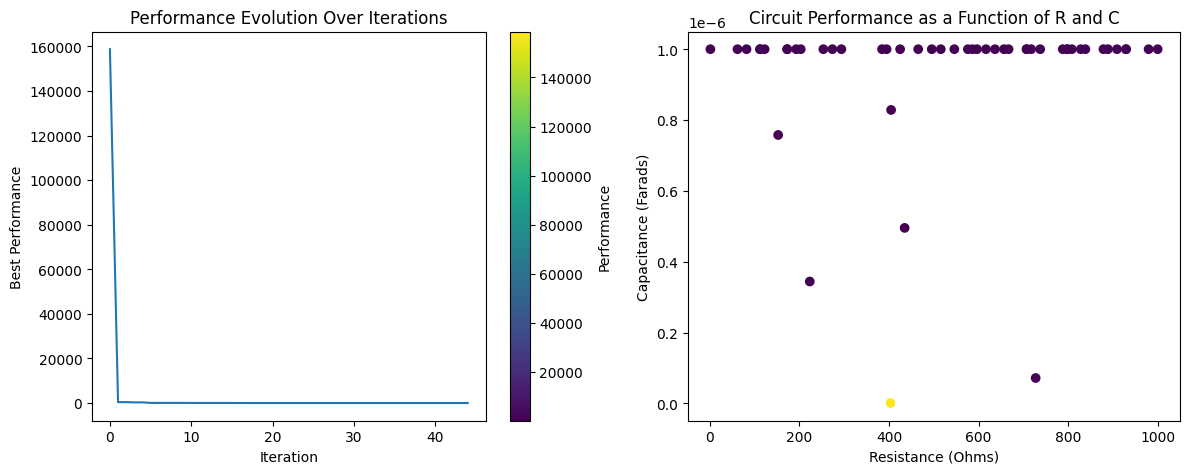

In [67]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize
from scipy.stats import norm

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Target frequency
f_target = 1000  # Hz

# Objective function
def objective_function(R, C):
    """
    Calculate the performance of a system based on its resistance and capacitance.

    The performance is evaluated as the absolute difference between the capacitive
    reactance and the resistance. The target frequency (f_target) is a global variable
    that should be set before calling this function.

    Args:
    - R: Resistance value.
    - C: Capacitance value.

    Returns:
    - performance: The absolute difference between capacitive reactance and resistance.
    """
    # Calculate capacitive reactance for a target frequency
    X_C = 1 / (2 * np.pi * f_target * C)
    
    # Compute performance as the absolute difference between X_C and R
    performance = np.abs(X_C - R)
    return performance

# Initializing the search space
R_range = np.linspace(1, 1000, 100)  # Ohms
C_range = np.linspace(1e-9, 1e-6, 100)  # Farads

# Initial random selection
np.random.seed(2)
R_samples = np.random.choice(R_range, 5)
C_samples = np.random.choice(C_range, 5)
performances = [objective_function(R, C) for R, C in zip(R_samples, C_samples)]

# Gaussian process with Matern kernel
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=5)

def reshape_for_gp(R_samples, C_samples):
    """
    Reshape resistance and capacitance sample arrays for Gaussian Process modeling.

    Args:
    - R_samples: An array of resistance samples.
    - C_samples: An array of capacitance samples.

    Returns:
    - A 2D NumPy array where each row is a pair of resistance and capacitance values.
    """
    # Zip the two arrays and convert to a NumPy array
    return np.array(list(zip(R_samples, C_samples)))

def expected_improvement(X, X_sample, Y_sample, gp, xi=0.01):
    """
    Calculate the expected improvement for Gaussian Process optimization.

    Args:
    - X: Points at which EI shall be evaluated.
    - X_sample: Sample input points.
    - Y_sample: Sample output points.
    - gp: A trained Gaussian Process model.
    - xi: Exploration-exploitation trade-off parameter.

    Returns:
    - ei: The expected improvement at each point in X.
    """
    # Predict mean and standard deviation using the GP model
    mu, sigma = gp.predict(X, return_std=True)
    mu_sample = gp.predict(X_sample)

    with np.errstate(divide='warn'):
        # Calculate improvement relative to the current best
        imp = mu - np.min(mu_sample) - xi
        Z = imp / sigma
        # Calculate expected improvement
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        # Set EI to 0 where sigma is 0 (to avoid division by zero)
        ei[sigma == 0.0] = 0.0

    return ei

# Simplified Bayesian optimization loop
best_performance = np.inf
best_R, best_C = None, None
performance_evolution = []

for _ in range(45):
    # Update Gaussian process
    gp.fit(reshape_for_gp(R_samples, C_samples), performances)

    # Use acquisition function to find the next point
    def acquisition(RC):
        return -expected_improvement(RC.reshape(-1, 2), reshape_for_gp(R_samples, C_samples), performances, gp)

    res = minimize(acquisition, np.random.choice(R_range, 2), bounds=[(1, 1000), (1e-9, 1e-6)])
    next_R, next_C = res.x

    # Evaluate the next point
    next_perf = objective_function(next_R, next_C)

    # Update the data
    R_samples = np.append(R_samples, next_R)
    C_samples = np.append(C_samples, next_C)
    performances.append(next_perf)

    # Update best performance
    if next_perf < best_performance:
        best_performance = next_perf
        best_R = next_R
        best_C = next_C

    performance_evolution.append(best_performance)

# Displaying the results
print(f"Best performance: R = {best_R} Ohms, C = {best_C} F, Performance = {best_performance}")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot of performance evolution
ax[0].plot(performance_evolution)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Best Performance')
ax[0].set_title('Performance Evolution Over Iterations')

# Scatter plot of R and C
scatter = ax[1].scatter(R_samples, C_samples, c=performances, cmap='viridis')
ax[1].set_xlabel('Resistance (Ohms)')
ax[1].set_ylabel('Capacitance (Farads)')
ax[1].set_title('Circuit Performance as a Function of R and C')
plt.colorbar(scatter, ax=ax[0], label='Performance')

plt.tight_layout()
plt.show()

#### How to Read the 'Performance of the Circuit as a Function of R and C' Result

### 1. Performance Evolution Over Iterations (Line Chart)

This chart displays the evolution of the best performance metric over each iteration of the Bayesian optimization process. Here's how to read it:

- **X-Axis (Iteration):** Represents each iteration in the optimization process. Each point on the X-axis corresponds to an iteration, showing the sequential nature of the process.
- **Y-Axis (Best Performance):** Indicates the performance value, with lower values representing better performance. This is calculated as the absolute difference between the capacitive reactance and resistance at the target frequency.
- **Line Plot:** Shows the minimum performance value achieved up to each iteration. A downward trend in this line indicates an improvement in performance.

Key Insights:
- Look for a downward trend, which suggests that the optimization is successfully finding better combinations of resistance (R) and capacitance (C).
- The final point on the chart represents the best overall performance achieved during the optimization.

### 2. Circuit Performance as a Function of R and C (Scatter Plot)

This chart visualizes the performance of various R (resistance) and C (capacitance) combinations used during the optimization. Here's how to read it:

- **X-Axis (Resistance - Ohms):** Displays the resistance values in ohms for different combinations tested.
- **Y-Axis (Capacitance - Farads):** Shows the capacitance values in farads for the combinations.
- **Color Scale (Performance):** The color of each point indicates the performance of that particular R-C combination, with the color scale shown on the color bar. Darker or lighter colors indicate different performance levels, as specified by the color bar's label.

Key Insights:
- Points with similar colors have similar performance levels.
- The distribution of colors can reveal patterns or trends in how resistance and capacitance affect performance.
- The optimal R-C combination can be identified as the point with the color representing the lowest performance value.

End of demonstration

---

## Practical Optimization Tools

1. **[GPyOpt (Python):](https://sheffieldml.github.io/GPyOpt/)**
   GPyOpt is a Python open-source library specifically designed for Bayesian optimization with Gaussian processes. It leverages the GPy library for Gaussian process modeling. GPyOpt is popular for its flexibility and ease in handling a wide range of optimization problems, especially in hyperparameter tuning for machine learning models.

2. **[SMAC (Java):](https://github.com/automl/SMAC3)**
   SMAC (Sequential Model-based Algorithm Configuration) is an open-source tool implemented in Java, widely used for hyperparameter optimization, particularly in the domain of machine learning. It employs a Bayesian optimization framework using a combination of random forests and Gaussian processes. SMAC is known for its effectiveness in dealing with high-dimensional spaces and categorical parameters. While it's primarily Java-based, SMAC also provides interfaces for Python, making it versatile and accessible for a broader audience.

3. **[Spearmint (Python):](https://github.com/JasperSnoek/spearmint)**
   Spearmint is an open-source Bayesian optimization platform implemented in Python. It's particularly effective in optimizing expensive functions, where each function evaluation can be time-consuming. Spearmint is designed to be straightforward to set up and run, and it integrates well with other Python-based data science tools.

4. **[BayesOpt (C++):](https://github.com/rmcantin/bayesopt)**
   BayesOpt is a C++ library for Bayesian optimization, also providing interfaces for Python. It's well-suited for optimizing functions that are noisy and expensive to evaluate. This library is known for its robustness and has been used in various applications, including robotics and machine learning.

5. **[Dragonfly (Python):](https://github.com/dragonfly/dragonfly)**
   Dragonfly is an open-source library for scalable Bayesian optimization. It is written in Python but can also be used from other languages through its RESTful API. Dragonfly is designed for large-scale optimization problems and supports parallel evaluations, making it ideal for high-dimensional and expensive function evaluations.


## Sources


| Sources |
|---------|
| [Bayesian optimization - Wikipedia](https://en.wikipedia.org/wiki/Bayesian_optimization) |
| [Bayesian Optimization Algorithm - MathWorks](https://fr.mathworks.com/help/stats/bayesian-optimization-algorithm.html) |
| [Bayesian optimization, what is it? How to use it best? - Inside Machine Learning](https://inside-machinelearning.com/en/bayesian-optimization/) |
| [Bayesian optimization with known experimental and design constraints for chemistry applications - Publishing](https://pubs.rsc.org/en/content/articlelanding/2022/dd/d2dd00028h) |
| [Practical Bayesian Optimization of Machine Learning Algorithms - arxiv.org](https://ar5iv.labs.arxiv.org/html/1206.2944) |
| [Benchmarking the performance of Bayesian optimization across multiple experimental materials science domains - Nature.com](https://www.nature.com/articles/s41524-021-00656-9) |
| [Practical Path-based Bayesian Optimization - Paperswithcode](https://paperswithcode.com/paper/practical-path-based-bayesian-optimization) |
| [Bayesian optimization - Cornell university](https://optimization.cbe.cornell.edu/index.php?title=Bayesian_Optimization) |
| [How to Implement Bayesian Optimization from Scratch in Python - Machine Learning Mastery](https://machinelearningmastery.com/what-is-bayesian-optimization/) |
| [DOE vs Bayesian Optimization: A Comparison - The Advanced Materials Show](https://advancedmaterialsshow.com/blog/doe-vs-bayesian-optimization-a-comparison/) |